In [1]:
!sudo -H pip3 install -U pystan

    100% |████████████████████████████████| 62.2MB 24kB/s 
    100% |████████████████████████████████| 16.8MB 90kB/s 
    100% |████████████████████████████████| 7.0MB 224kB/s 
  Found existing installation: numpy 1.11.2
    Uninstalling numpy-1.11.2:
      Successfully uninstalled numpy-1.11.2


In [2]:
import pystan

In [3]:
schools_code = """
data {
    int<lower=2> T; // number of obsered markets
    int<lower=2> J; // number of products
    int<lower=0> i[T]; // number of consumers in each market
    
    int<lower=1> L; // number of customer demographics
    real         y[I]; // income of consumer I
    
    int<lower=1> K; // number of observed product characteristics
    vector[K]    x[J]; // observed product characteristics (K-dimensional vector)
    vector<lower=0>[T] p[J]; // product price across markets for each product
    
    vector<lower=0>[T] S[J]; // observed market share of each product across markets
}

parameters {
    real         ksi[J]; // unobserved product characteristic
    vector[K]    beta[I]; // preferences of customer I for product characteristics
    vector[L]    tau[I]; // customer demographics (L-dimensional vector)

}
transformed parameters {
    int<lower=2> I; // number of consumers
    for (t in 1:T)
        I <- I + i[t]

}
model {
    delta[j][t] =  x[j][t]*Beta - Alpha * p[j][t] + ksi[j][t]
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

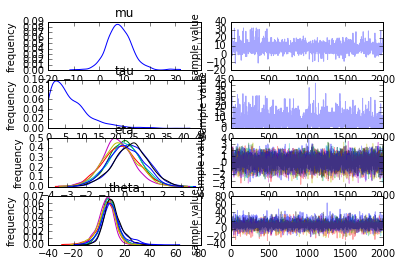

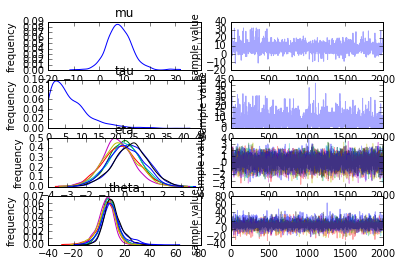

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(30,20))

fit.plot()